# Relatório de Análise VII

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

## Criando Agrupamentos

In [33]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33,Apartamento
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28,Apartamento


In [34]:
dados['Valor'].mean()

5046.172821405663

In [35]:
grupo_bairro = dados.groupby('Bairro')

In [36]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


## Estatísticas Descritivas

In [37]:
grupo_bairro['Valor'].describe().round(2).head(15)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.00,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.00,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.50,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.00,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.00,7000.0
Arpoador,12.0,12923.92,9064.21,4200.0,7325.0,8600.0,16221.75,30000.0
Bancários,4.0,1825.00,665.21,1300.0,1525.0,1600.0,1900.00,2800.0
Bangu,20.0,1016.00,347.24,400.0,825.0,950.0,1187.50,1650.0
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.00,600000.0


In [38]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Abolição,800.0,2300.0
Alto da Boa Vista,600.0,15000.0
Anchieta,700.0,1000.0
Andaraí,700.0,2950.0
Anil,300.0,7000.0
...,...,...
Vila Valqueire,800.0,16000.0
Vila da Penha,450.0,4500.0
Vista Alegre,700.0,1400.0


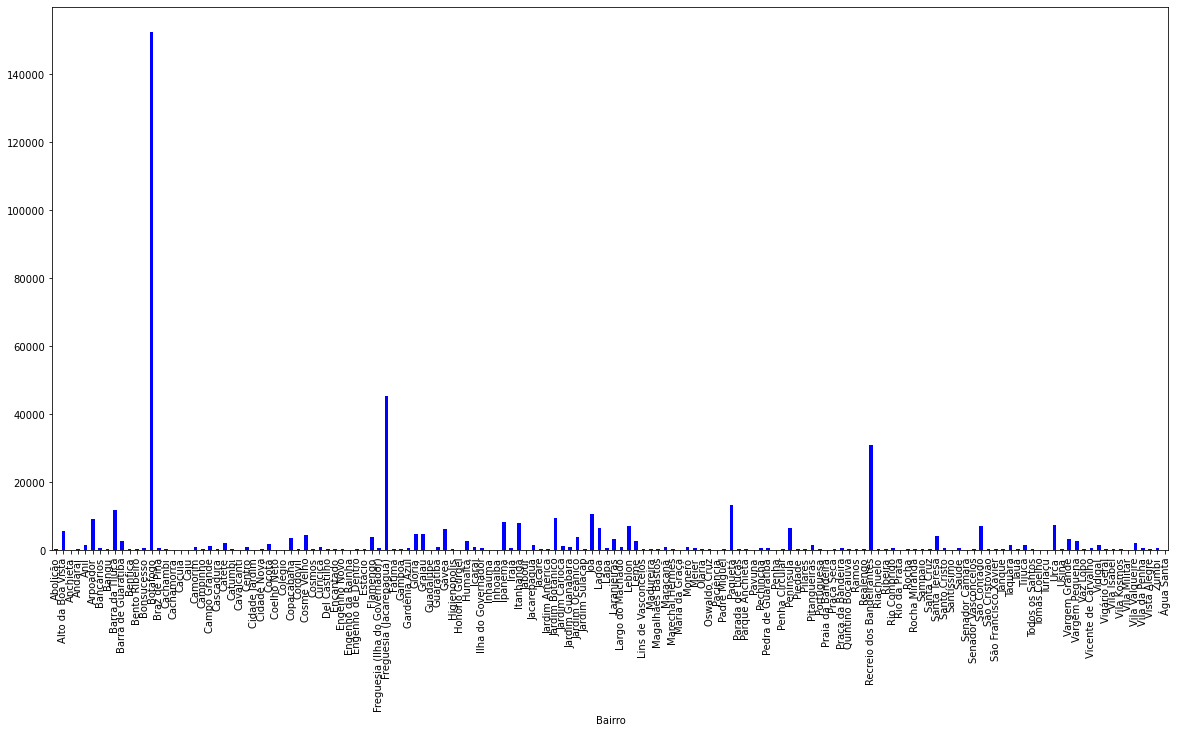

In [40]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

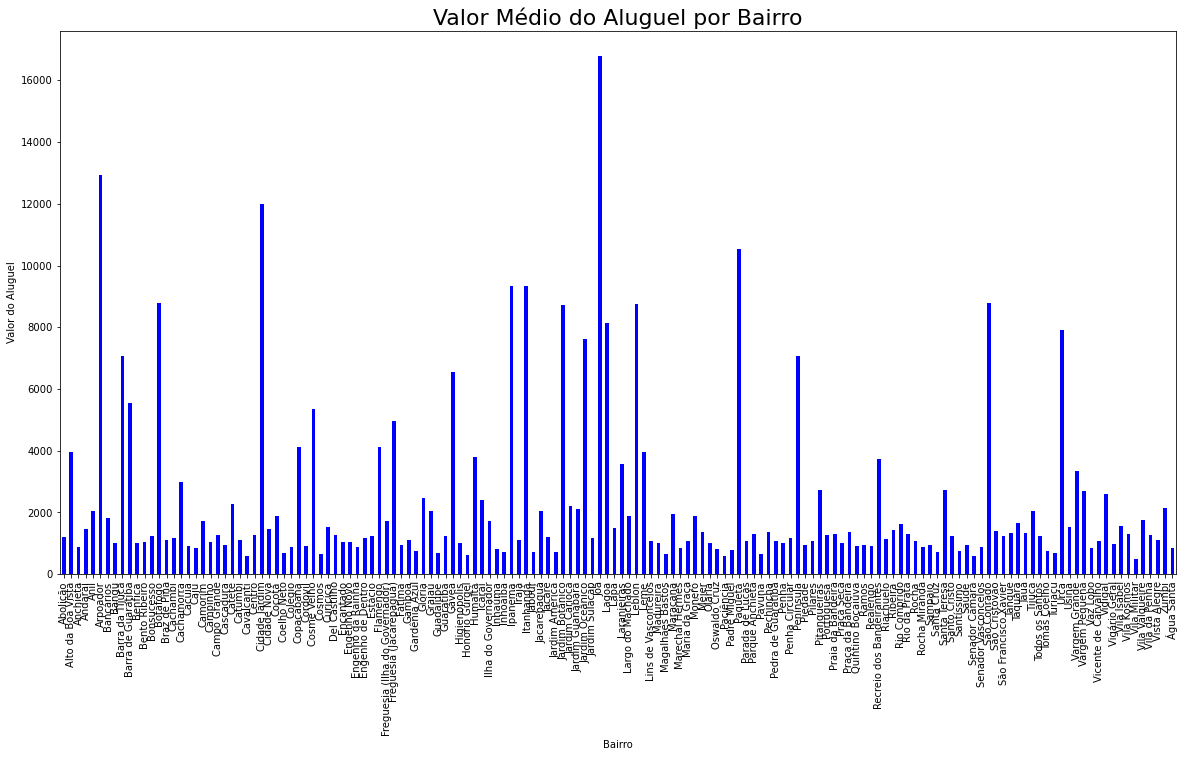

In [41]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})